In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapley import ShapleyIndices, ShapleyKrigingIndices, SobolIndices, SobolKrigingIndices
from shapley.tests import Ishigami, AdditiveGaussian
from shapley.tests.utils import true_gaussian_full_ind_sobol
from shapley.plots import set_style_paper, plot_sensitivity_results

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

savefigs = False
ylim = [-0.05, 1.05]

In [2]:
dim = 3
beta = None
model = AdditiveGaussian(dim=dim, beta=beta)
model.margins = [ot.Normal()]*(dim-1) + [ot.Normal(0, 2.)]

In [29]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
n_corr = 10
corrs = np.linspace(-0.999, 0.999, n_corr)

Nv = 5000
No = 200
Ni = 200

max_budget = 20000
n_boot = 2000

estimator_sobol = 'soboleff2'
estimator_sobol_full_ind = 'sobolmara'

In [32]:
result_indices = {'Shapley': [],
                  'First Sobol': [],
                  'Total Sobol': [],
                  'First full Sobol': [],
                  'Total full Sobol': [],
                  'First ind Sobol': [],
                  'Total ind Sobol': []
                 }

for corr in corrs:
    theta = [0., 0., corr]
    model.copula_parameters = theta
    true_full_indices, true_ind_indices = true_gaussian_full_ind_sobol(theta, dim=dim)
        
    #Sobol Full and Ind
    n_sample = int(max_budget / (dim*4))
    sobol = SobolIndices(model.input_distribution)
    sobol.build_uncorrelated_mc_sample(model, n_sample)
    sobol_results_full = sobol.compute_full_indices(n_boot=n_boot, estimator=estimator_sobol_full_ind)
    sobol_results_ind = sobol.compute_ind_indices(n_boot=n_boot, estimator=estimator_sobol_full_ind)
    
    # Shapley
    shapley = ShapleyIndices(model.input_distribution)
    shapley.build_mc_sample(model=model, n_perms=None, Nv=Nv, No=No, Ni=Ni)
    shapley_results = shapley.compute_indices(n_boot=n_boot)
    
    # Save results
    result_indices['Shapley'].append(shapley_results.full_shapley_indices.ravel())
    result_indices['First Sobol'].append(shapley_results.full_first_indices.ravel())
    result_indices['Total Sobol'].append(shapley_results.full_total_indices.ravel())
    result_indices['First full Sobol'].append(sobol_results_full.full_first_indices.ravel())
    result_indices['Total full Sobol'].append(sobol_results_full.full_total_indices.ravel())    
    result_indices['First ind Sobol'].append(sobol_results_ind.full_first_indices.ravel())
    result_indices['Total ind Sobol'].append(sobol_results_ind.full_total_indices.ravel())

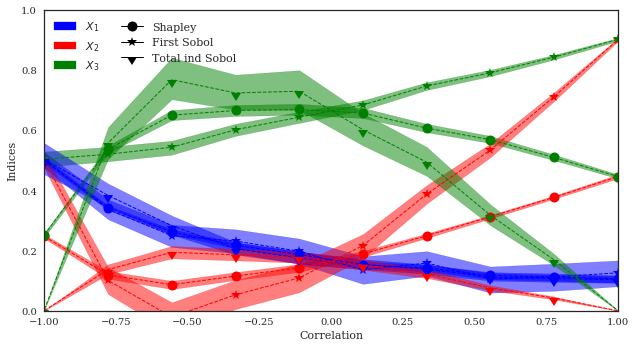

In [33]:
import matplotlib.lines as mlines
from shapley.plots import plot_correlation_indices

fig, ax=plt.subplots(figsize=(9, 5))

to_plot = ['Shapley', 'First Sobol', 'Total ind Sobol']
linewidth = 1
markersize = 10

plot_correlation_indices(result_indices, corrs, n_boot, ax=ax, to_plot=to_plot, alpha=[0.01, 0.99])

fig.tight_layout()

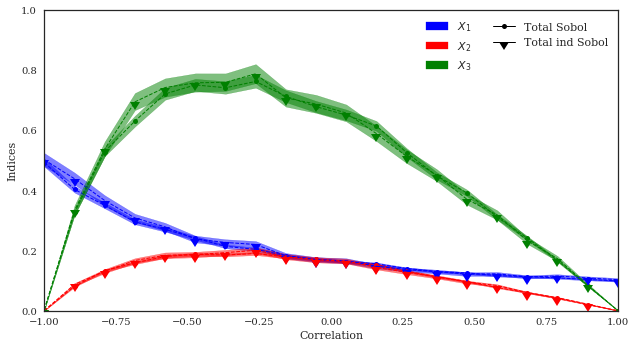

In [23]:
import matplotlib.lines as mlines
from shapley.plots import plot_correlation_indices

fig, ax=plt.subplots(figsize=(9, 5))

to_plot = ['Total Sobol', 'Total ind Sobol']
linewidth = 1
markersize = 10

plot_correlation_indices(result_indices, corrs, n_boot, ax=ax, to_plot=to_plot)

fig.tight_layout()

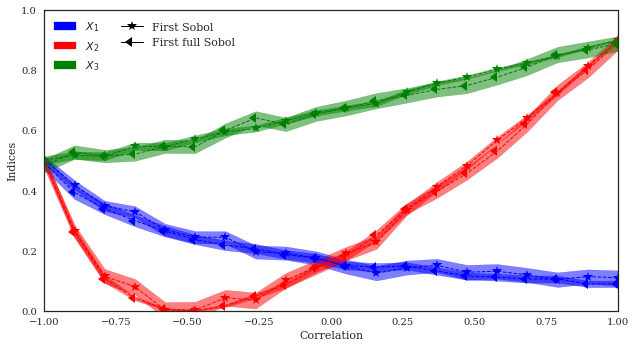

In [24]:
import matplotlib.lines as mlines
from shapley.plots import plot_correlation_indices

fig, ax=plt.subplots(figsize=(9, 5))

to_plot = ['First Sobol', 'First full Sobol']
linewidth = 1
markersize = 10

plot_correlation_indices(result_indices, corrs, n_boot, ax=ax, to_plot=to_plot)

fig.tight_layout()